#Trabajo Práctico N° 4


*   Pérez Pezoa, Victoria Elizabeth

Consignas:

1. Buscar los siguiente dataset en la web:
* Titanic
* Iris
* Wine
* Indian Diabetes

2. Explicar de cada dataset sus diferente variables

3. Decide justificando tu respuesta, qué tipo de categoría de variable son

4. Detectar y arreglar:

* Valores Ausente
* Valores Atípicos

5. De los diferentes dataset, se puede eliminar alguna columna?

6. Realizar análisis univariados

* Gráfico de frecuencia
* Gráfico de torta
* Histograma
* etc.

7. En base a los gráficos del punto 6 realizar distintas concluciones

8. Realizar análisis de correlación y explicar qué variables están correlacionadas

9. Realizar un análisis de gráfico de Chernoff y detectar outliers

PD: Pueden Buscar data set de kaggle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Ítem 1. Dataset Titanic** (Victoria Pérez Pezoa)

In [ ]:
url = 'https://raw.githubusercontent.com/Vikpezoa/TP-4-/main/train_and_test2.csv'
df_titanic=pd.read_csv(url)

# df = pd.read_csv(url)
# df.head()

**Ítem 2.**

In [ ]:
df_titanic.describe

<bound method NDFrame.describe of       Passengerid   Age      Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0               1  22.0    7.2500    0      1     0       0       0       0   
1               2  38.0   71.2833    1      1     0       0       0       0   
2               3  26.0    7.9250    1      0     0       0       0       0   
3               4  35.0   53.1000    1      1     0       0       0       0   
4               5  35.0    8.0500    0      0     0       0       0       0   
...           ...   ...       ...  ...    ...   ...     ...     ...     ...   
1304         1305  28.0    8.0500    0      0     0       0       0       0   
1305         1306  39.0  108.9000    1      0     0       0       0       0   
1306         1307  38.5    7.2500    0      0     0       0       0       0   
1307         1308  28.0    8.0500    0      0     0       0       0       0   
1308         1309  28.0   22.3583    0      1     0       0       0       0   

      zero.4  ...

**Ítem 3.**
* El dataframe dispone de 28 columnas de las cuales 19 son de 0's y las restantes son:
* passenger id (discreta), age (discreta) , fare (variable continua), sex (dicotomica), sibsp (discreta), parch(discreta),p class (discreta), embarked (discreta),survived(dicotomica)
* passenger id es el id correspondiente a cada pasajero
* age es la edad correspondiente a cada pasajero
* fare es la tarifa que deben abonar
* sex corresponde al sexo cada pasajero donde 0 es varones y 1 es mujeres
* sibsp no se explica en ningún lugar a que corresponde
* parch al igual que sibsp no puedo saber que significa
*class es la clase de pasajero con la clase minima de valor "1" y la maxima de valor "3"
* embarked deberia ser dicotómica, indicando si se subio o no a la embarcacion por lo cual no se entiende por que va de los valores 0,1 y 2.
* survived es la variable que corresponde a la supervivencia o no del pasajero, donde 0 es no, y 1 es sobrevivio.

**Ítem 4.**

In [ ]:
df_titanic.iloc[:,21].max()
df_titanic.iloc[:,21].min()
#observo el rango de la variable passanger class (pclass)

1

In [ ]:
for indice, columna in enumerate(df_titanic.columns):
    print(f"Columna {indice}: {columna}")
#para poder localizar el nombre de cada columna con su respectiva ubicacion en el dataframe

Columna 0: Passengerid
Columna 1: Age
Columna 2: Fare
Columna 3: Sex
Columna 4: sibsp
Columna 5: zero
Columna 6: zero.1
Columna 7: zero.2
Columna 8: zero.3
Columna 9: zero.4
Columna 10: zero.5
Columna 11: zero.6
Columna 12: Parch
Columna 13: zero.7
Columna 14: zero.8
Columna 15: zero.9
Columna 16: zero.10
Columna 17: zero.11
Columna 18: zero.12
Columna 19: zero.13
Columna 20: zero.14
Columna 21: Pclass
Columna 22: zero.15
Columna 23: zero.16
Columna 24: Embarked
Columna 25: zero.17
Columna 26: zero.18
Columna 27: 2urvived


**Ítem 5.**

In [ ]:
#eliminamos las columnas con ceros:
columns_a_eliminar=[5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,22,23,25,26]
df_titanic_2 = df_titanic.drop(columns=df_titanic.columns[columns_a_eliminar])
df_titanic_2 = df_titanic_2.rename(columns={'2urvived': 'survived'}) #corrijo la columna 2urvived y la llamo survived

In [ ]:
df_titanic_2
#dataframe limpio de 0's

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,3,2.0,0
1305,1306,39.0,108.9000,1,0,0,1,0.0,0
1306,1307,38.5,7.2500,0,0,0,3,2.0,0
1307,1308,28.0,8.0500,0,0,0,3,2.0,0


In [ ]:
indice_columna = 7

# Reemplazar los valores 2 por NaN en la columna indicada
df_titanic_2.iloc[:, indice_columna] = np.where(df_titanic_2.iloc[:, indice_columna] == 2, np.nan, df_titanic_2.iloc[:, indice_columna])
df_titanic_2['Sex'] = df_titanic_2['Sex'].replace({0: 'male', 1: 'female'})
print(df_titanic_2)
# la variable embarked debe de ser dicotomica (subio o no subio), por ende, consideramos que el numero "2" es un dato faltante.

      Passengerid   Age      Fare     Sex  sibsp  Parch  Pclass  Embarked  \
0               1  22.0    7.2500    male      1      0       3       NaN   
1               2  38.0   71.2833  female      1      0       1       0.0   
2               3  26.0    7.9250  female      0      0       3       NaN   
3               4  35.0   53.1000  female      1      0       1       NaN   
4               5  35.0    8.0500    male      0      0       3       NaN   
...           ...   ...       ...     ...    ...    ...     ...       ...   
1304         1305  28.0    8.0500    male      0      0       3       NaN   
1305         1306  39.0  108.9000  female      0      0       1       0.0   
1306         1307  38.5    7.2500    male      0      0       3       NaN   
1307         1308  28.0    8.0500    male      0      0       3       NaN   
1308         1309  28.0   22.3583    male      1      1       3       0.0   

      survived  
0            0  
1            1  
2            1  
3      

**Ítems 6., 7. y 8.**

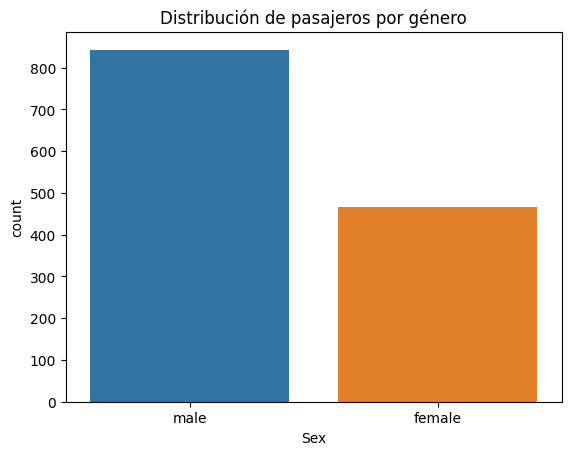

In [ ]:
sns.countplot(x='Sex', data=df_titanic_2)
plt.title('Distribución de pasajeros por género')
plt.xticks([0, 1], ['male', 'female'])
plt.show()

In [ ]:
survival_rate_by_gender = df_titanic_2.groupby('Sex')['survived'].mean()
print(survival_rate_by_gender)
# tasa de supervivencia por género, donde 0 corresponde a male y 1 a female, siendo del 12,93% y 50% correspondientemente.

Sex
female    0.5000
male      0.1293
Name: survived, dtype: float64


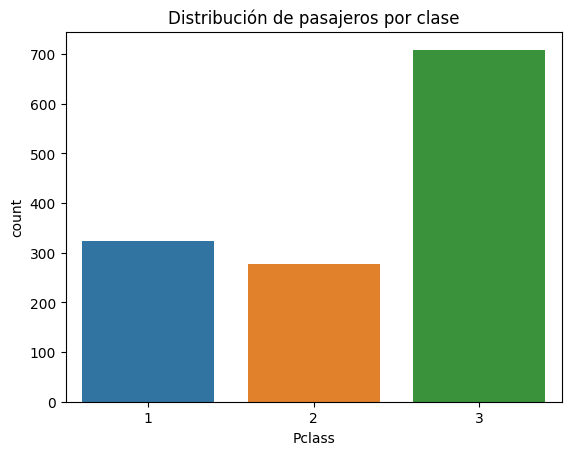

In [ ]:
sns.countplot(x='Pclass', data=df_titanic_2)
plt.title('Distribución de pasajeros por clase')
plt.show()

<Axes: >

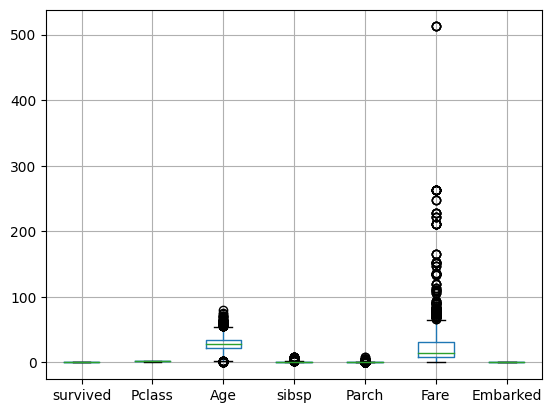

In [ ]:
df_titanic_2[['survived','Pclass','Sex','Age','sibsp','Parch','Fare','Embarked']].boxplot()
# distribuciones en boxplot para las variables survived, clase de pasajero, sexo, edad, etc.

<Axes: >

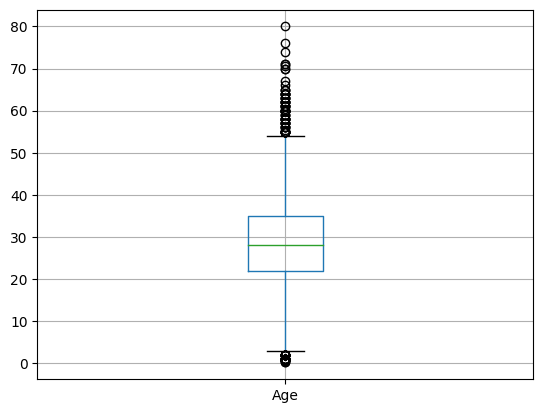

In [ ]:
df_titanic_2[['Age']].boxplot()

In [ ]:
def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Llamamos a la función para cada columna numérica donde desees detectar outliers
columns_to_check = ["Fare"]
outliers_list = []
for col in columns_to_check:
    outliers = detect_outliers_iqr(df_titanic_2, col)
    outliers_list.append(outliers)

columns_to_check2 = ["Age"] #
outliers_list2 = [] #
for col in columns_to_check2 :
    outliers2 = detect_outliers_iqr(df_titanic_2, col) #
    outliers_list2.append(outliers)

columns_to_check3 = ["Parch"] #
outliers_list3 = [] #
for col in columns_to_check3 :
    outliers3 = detect_outliers_iqr(df_titanic_2, col) #
    outliers_list3.append(outliers)

columns_to_check4 = ["sibsp"] #
outliers_list4 = [] #
for col in columns_to_check4 :
    outliers4 = detect_outliers_iqr(df_titanic_2, col) #
    outliers_list4.append(outliers)

# Concatenamos todos los outliers encontrados en un solo DataFrame
outliers_df = pd.concat(outliers_list)
outliers_df2 = pd.concat(outliers_list)
outliers_df3 = pd.concat(outliers_list)
outliers_df4 = pd.concat(outliers_list)

In [ ]:
print(outliers_df['Fare'])
print(outliers_df2['Age'])
print(outliers_df3['Parch'])
print(outliers_df4['sibsp'])

In [ ]:
# No consideramos necesario borrar los outliers asociados a la edad puesto que es factible que haya viajado gente mayor
# Tampoco sabemos si es válido borrar los datos asociados a la tarifa, puesto que no sabemos con exactitud los montos a abonar para el ingreso.

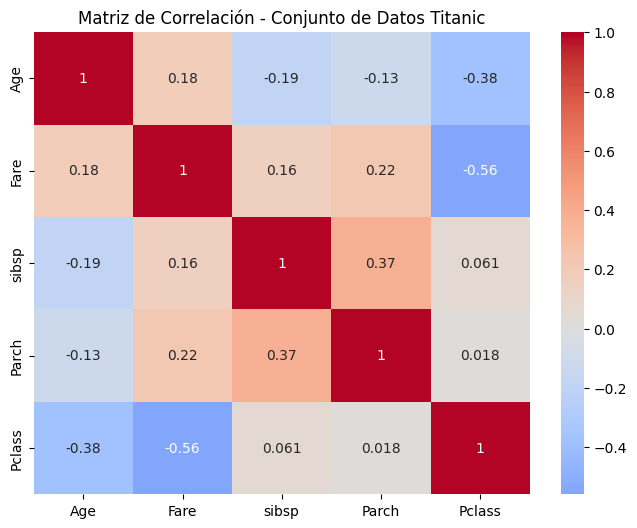

In [ ]:
# Crear una figura y un mapa de calor de la matriz de correlación

columnas_a_excluir = ['Passengerid', 'Sex' , 'Embarked','survived']  # Reemplaza con las columnas que deseas excluir

# Creo una copia del DataFrame excluyendo las columnas con variables dicotomicas
df_sin_columnas = df_titanic_2.drop(columns=columnas_a_excluir)

# Calcular la matriz de correlación para el DataFrame modificado
correlation_matrix = df_sin_columnas.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación - Conjunto de Datos Titanic")
plt.show()


**Ítem 9.**

Text(0, 0.5, 'Fare')

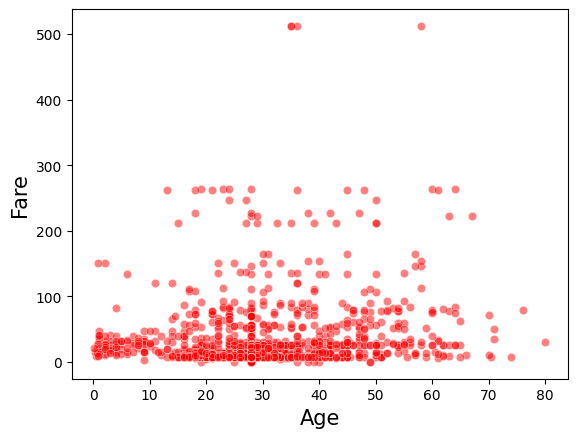

In [ ]:
sns.scatterplot(x=df_titanic_2['Age'], y=df_titanic_2['Fare'], alpha=0.5, color='Red')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Fare', fontsize=15)
# Notamos en el diagrama de dispersion que se corresponde con una correlación nula con r=0, 18<0,2

Text(0, 0.5, 'Tarifa')

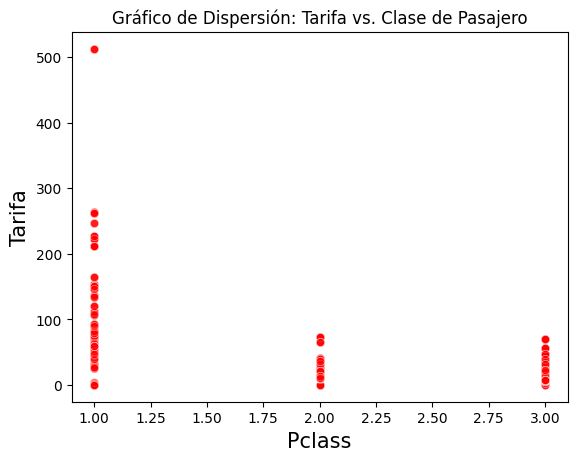

In [ ]:
plt.title('Gráfico de Dispersión: Tarifa vs. Clase de Pasajero')
sns.scatterplot(x=df_titanic_2['Pclass'], y=df_titanic_2['Fare'], alpha=0.5, color='Red')
plt.xlabel('Pclass', fontsize=15)
plt.ylabel('Tarifa', fontsize=15)
# puede evidenciarse que acorde al diagrama de dispersion, la mayor variabilidad de precios elevados se encuentra en la primera clase
# (Recordamos que para este escenario, el r=-0,56 y se observa esta marcada tendencia negativa de los datos).

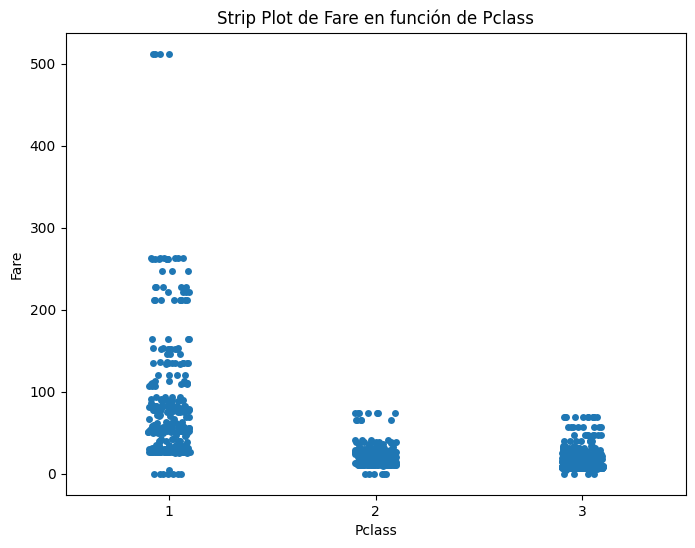

In [ ]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='Pclass', y='Fare', data=df_titanic_2, jitter=True)
plt.title('Strip Plot de Fare en función de Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()
# Nos permite observar que no hay tarifas intermedias entre los 280 aproximadamente y tarifas mayores a 500
# Además, notamos que las tarifas más elevadas corresponden a la primera clase, mientras que las clases 2 y 3 poseen tarifas menores en promedio.

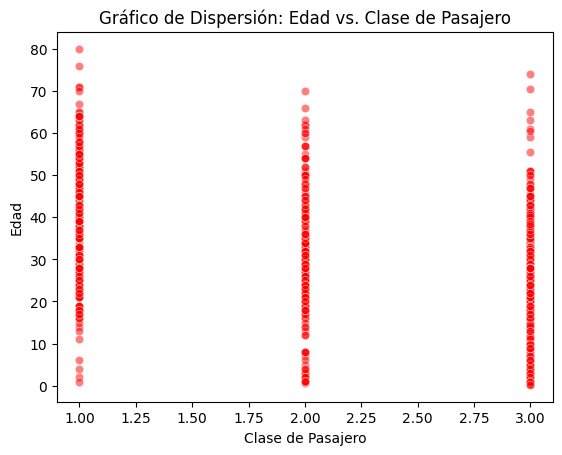

In [ ]:
# Creo un gráfico de dispersión con Seaborn
sns.scatterplot(x=df_titanic_2['Pclass'], y=df_titanic_2['Age'], alpha=0.5, color='Red')

# Agregar título y etiquetas a los ejes
plt.title('Gráfico de Dispersión: Edad vs. Clase de Pasajero')
plt.xlabel('Clase de Pasajero')
plt.ylabel('Edad')
# conviene emplear un stripplot dado que no podemos ver la densidad de pasajeros de un determinado rango etario.
plt.show()

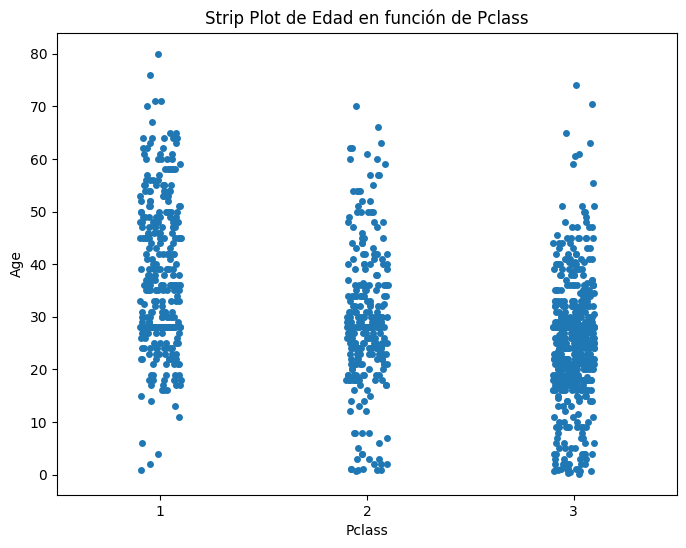

In [ ]:

# Crear un stripplot
plt.figure(figsize=(8, 6))
sns.stripplot(x='Pclass', y='Age', data=df_titanic_2, jitter=True)
plt.title('Strip Plot de Edad en función de Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

# Con este gráfico podemos visualizar la densidad de puntos para pasajeros de una determinada categoria a una determinada edad.
# Observando por ejemplo que la densidad disminuye en los extremos para cada clase de pasajero, como tambien una gran densidad de pasajeros de entre
# 18 y unos 30 años aproximadamente para la tercera clase.
# La primera y segunda clase se encuentran más homogéneamente distribuidas, sin embargo, se observa una menor densidad de pasajeros en el intervalo de
# 40 a 70 años aproximadamente.

In [ ]:
average_age_by_class = df_titanic_2.groupby('Pclass')['Age'].mean()
print(average_age_by_class)
# Evidenciamos que en promedio, las menores edades se localizan en las clases 2 y 3 respectivamente (Recordamos ademas que r=-0,38).

Pclass
1    37.812446
2    29.419675
3    25.750353
Name: Age, dtype: float64


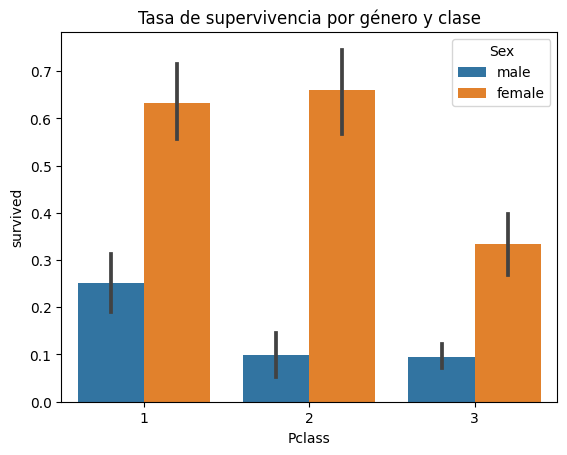

Sex     Pclass
female  1         0.631944
        2         0.660377
        3         0.333333
male    1         0.251397
        2         0.099415
        3         0.095335
Name: survived, dtype: float64


In [ ]:
sns.barplot(x='Pclass', y='survived', hue='Sex', data=df_titanic_2)
plt.title('Tasa de supervivencia por género y clase')
plt.show()
# podemos observar la tasa de supervivencia por genero y clase en esta gráfica. Primeramente las probabilidades de supervivencia disminuyen desde la clase 1
# a la clase 2 y 3 de varones. El comportamiento con las mujeres es similar, minimo en la tercera clase pero máximo para la segunda clase.
# Por otro lado, respecto del género se observa que los varones poseen una menor tasa de supervivencia respecto de la de las mujeres en general para toda clase
survival_rate_by_gender_class = df_titanic_2.groupby(['Sex', 'Pclass'])['survived'].mean()
print(survival_rate_by_gender_class)
# Al imprimir la tasa de supervivencia para cada barra, notamos que para ambos generos, la clase con menor tasa de supervivencia fue la tercera.